In [7]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [1]:
dataset = "./model/kp_classifier.csv"
model_save_path = "./model/kp_classifier.hdf5"
tflite_save_path = "./model/kp_classifier.tflite"

In [26]:
NUM_CLASSES = 36

In [25]:
x = np.loadtxt(dataset, delimiter=",", dtype='float32', skiprows=1, usecols=list(range(1, (21 * 2) + 1)))
y = np.loadtxt(dataset, delimiter=",", dtype='int32', skiprows=1, usecols=(0))

In [27]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=42)


In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 36)                396       
                                                                 
Total params: 1466 (5.73 KB)
Trainable params: 1466 (5.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True, monitor='val_accuracy', mode='max'
)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [30]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
model.fit(
    x_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/12 [=>............................] - ETA: 11s - loss: 3.5764 - accuracy: 0.0625
Epoch 1: val_accuracy improved from -inf to 0.04391, saving model to ./model\kp_classifier.hdf5
12/12 [==============================] - 1s 26ms/step - loss: 3.5888 - accuracy: 0.0366 - val_loss: 3.5422 - val_accuracy: 0.0439
Epoch 2/1000
 1/12 [=>............................] - ETA: 0s - loss: 3.5355 - accuracy: 0.0625
Epoch 2: val_accuracy improved from 0.04391 to 0.07385, saving model to ./model\kp_classifier.hdf5
12/12 [==============================] - 0s 7ms/step - loss: 3.5640 - accuracy: 0.0493 - val_loss: 3.5163 - val_accuracy: 0.0739
Epoch 3/1000
 1/12 [=>............................] - ETA: 0s - loss: 3.5734 - accuracy: 0.0156
Epoch 3: val_accuracy improved from 0.07385 to 0.08782, saving model to ./model\kp_classifier.hdf5


d:\BINUS\Assignments\Semester 3\AI\SignoAI\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 0s 7ms/step - loss: 3.5420 - accuracy: 0.0526 - val_loss: 3.4941 - val_accuracy: 0.0878
Epoch 4/1000
 1/12 [=>............................] - ETA: 0s - loss: 3.4777 - accuracy: 0.0703
Epoch 4: val_accuracy improved from 0.08782 to 0.09381, saving model to ./model\kp_classifier.hdf5
12/12 [==============================] - 0s 8ms/step - loss: 3.5133 - accuracy: 0.0553 - val_loss: 3.4711 - val_accuracy: 0.0938
Epoch 5/1000
 1/12 [=>............................] - ETA: 0s - loss: 3.5236 - accuracy: 0.0859
Epoch 5: val_accuracy improved from 0.09381 to 0.11377, saving model to ./model\kp_classifier.hdf5
12/12 [==============================] - 0s 8ms/step - loss: 3.4838 - accuracy: 0.0806 - val_loss: 3.4426 - val_accuracy: 0.1138
Epoch 6/1000
 1/12 [=>............................] - ETA: 0s - loss: 3.4720 - accuracy: 0.0859
Epoch 6: val_accuracy improved from 0.11377 to 0.13373, saving model to ./model\kp_classifier.hdf5
12/12 [=====================

In [32]:
val_loss, val_acc = model.evaluate(x_test, y_test, batch_size=128)

4/4 [==============================] - 0s 2ms/step - loss: 0.9793 - accuracy: 0.7066


In [33]:
model = tf.keras.models.load_model(model_save_path)

16/16 [==============================] - 0s 1ms/step


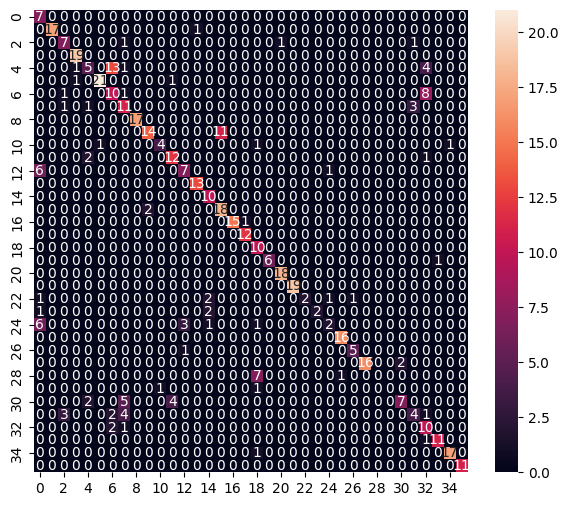

Classification Report
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         7
           1       1.00      0.94      0.97        18
           2       0.58      0.70      0.64        10
           3       0.90      1.00      0.95        19
           4       0.50      0.21      0.29        24
           5       0.95      0.91      0.93        23
           6       0.37      0.50      0.43        20
           7       0.46      0.69      0.55        16
           8       1.00      1.00      1.00        17
           9       0.88      0.56      0.68        25
          10       0.80      0.57      0.67         7
          11       0.71      0.80      0.75        15
          12       0.64      0.50      0.56        14
          13       0.93      1.00      0.96        13
          14       0.67      1.00      0.80        10
          15       0.62      0.90      0.73        20
          16       1.00      0.94      0.97        16
     

d:\BINUS\Assignments\Semester 3\AI\SignoAI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\BINUS\Assignments\Semester 3\AI\SignoAI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\BINUS\Assignments\Semester 3\AI\SignoAI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)